### Statistical Analysis of Long Spectral Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
spec_data = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Spectral_Long/bands_pool.csv')

In [3]:
spec_data

,Date,Genotype,Sex,Tx,Site,total_pw,delta_abs,theta_abs,gamma_slow_abs,gamma_fast_abs,delta_rel,theta_rel,gamma_slow_rel,gamma_fast_rel
0,41021,WT,Male,Pl,DG,110310.59,52165.69,27825.78,2048.33,277.22,0.47,0.25,0.02,0.00
1,41021,WT,Male,Pl,CA3,15255.57,7412.66,2834.96,328.88,79.13,0.49,0.19,0.02,0.01
2,41021,WT,Male,Pl,CA1,18206.26,10884.41,3199.59,261.89,32.55,0.60,0.18,0.01,0.00
3,271021,WT,Fem,Tx1,DG,31273.89,9627.76,7707.18,1518.39,154.67,0.31,0.25,0.05,0.00
4,271021,WT,Fem,Tx1,CA3,26440.23,10275.11,8384.49,987.61,87.29,0.39,0.32,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,110821,KO,Fem,Tx05,CA3,94780.78,74611.41,12333.25,633.92,253.92,0.79,0.13,0.01,0.00
107,110821,KO,Fem,Tx05,CA1,76465.14,68197.82,4522.80,126.62,48.24,0.89,0.06,0.00,0.00
108,90821,KO,Fem,Pl,DG,188746.42,160085.13,13277.18,2012.19,660.99,0.85,0.07,0.01,0.00
109,90821,KO,Fem,Pl,CA3,146970.50,123759.58,12907.61,699.01,192.85,0.84,0.09,0.00,0.00


Text(0.5, 1.1, 'DG')

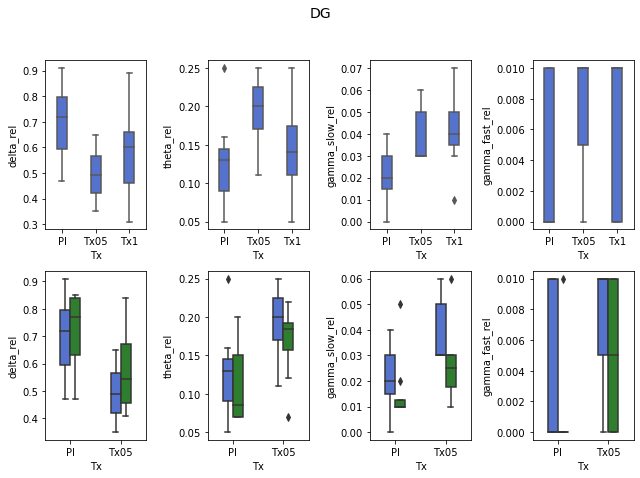

In [75]:
plt.figure(figsize=(9, 6))
ax1 = plt.subplot(241)
sns.boxplot(data =spec_data[(spec_data['Site']== 'DG') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax1)
ax1.get_legend().remove()
ax2 = plt.subplot(242)
sns.boxplot(data = spec_data[(spec_data['Site']== 'DG') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax2)
ax2.get_legend().remove()
ax3 = plt.subplot(243)
sns.boxplot(data = spec_data[(spec_data['Site']== 'DG') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax3)
ax3.get_legend().remove()
ax4 = plt.subplot(244)
sns.boxplot(data = spec_data[(spec_data['Site']== 'DG') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_fast_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax4)
ax4.get_legend().remove()

ax5 = plt.subplot(245)
sns.boxplot(data =spec_data[(spec_data['Site']== 'DG') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax5)
ax5.get_legend().remove()
ax6 = plt.subplot(246)
sns.boxplot(data = spec_data[(spec_data['Site']== 'DG') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax6)
ax6.get_legend().remove()
ax7 = plt.subplot(247)
sns.boxplot(data = spec_data[(spec_data['Site']== 'DG') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax7)
ax7.get_legend().remove()
ax8 = plt.subplot(248)
sns.boxplot(data = spec_data[(spec_data['Site']== 'DG') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_fast_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax8)
ax8.get_legend().remove()

plt.tight_layout()
plt.suptitle('DG', y = 1.1, size = 14)

In [3]:
print('Outlier Detection for DG \n')
for band in ['delta_rel', 'theta_rel', 'gamma_slow_rel', 'gamma_fast_rel']:
    for tx in ['Pl', 'Tx05', 'Tx1']:
        for gen in ['WT', 'KO']:
            print(f'{gen} {tx} {band}:')
            outs = pg.madmedianrule(spec_data[band][(spec_data['Site'] == 'DG') & (spec_data['Genotype'] == gen) & (spec_data['Tx'] == tx)])
            print(spec_data[band][(spec_data['Site'] == 'DG') & (spec_data['Genotype'] == gen) & (spec_data['Tx'] == tx)][outs])
            print('\n')

Outlier Detection for DG 

WT Pl delta_rel:
Series([], Name: delta_rel, dtype: float64)


KO Pl delta_rel:
51    0.47
Name: delta_rel, dtype: float64


WT Tx05 delta_rel:
Series([], Name: delta_rel, dtype: float64)


KO Tx05 delta_rel:
Series([], Name: delta_rel, dtype: float64)


WT Tx1 delta_rel:
Series([], Name: delta_rel, dtype: float64)


KO Tx1 delta_rel:
Series([], Name: delta_rel, dtype: float64)


WT Pl theta_rel:
0    0.25
Name: theta_rel, dtype: float64


KO Pl theta_rel:
51    0.20
81    0.15
84    0.15
Name: theta_rel, dtype: float64


WT Tx05 theta_rel:
Series([], Name: theta_rel, dtype: float64)


KO Tx05 theta_rel:
93     0.12
102    0.07
Name: theta_rel, dtype: float64


WT Tx1 theta_rel:
Series([], Name: theta_rel, dtype: float64)


KO Tx1 theta_rel:
Series([], Name: theta_rel, dtype: float64)


WT Pl gamma_slow_rel:
Series([], Name: gamma_slow_rel, dtype: float64)


KO Pl gamma_slow_rel:
51    0.05
84    0.02
Name: gamma_slow_rel, dtype: float64


WT Tx05 gamma_slow_

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/nonparametric.py:144: RuntimeWarning: divide by zero encountered in true_divide
  return (np.fabs(a - np.median(a)) / mad(a)) > k
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/nonparametric.py:144: RuntimeWarning: invalid value encountered in true_divide
  return (np.fabs(a - np.median(a)) / mad(a)) > k
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pingouin/nonparam

96    0.06
Name: gamma_slow_rel, dtype: float64


WT Tx1 gamma_slow_rel:
Series([], Name: gamma_slow_rel, dtype: float64)


KO Tx1 gamma_slow_rel:
Series([], Name: gamma_slow_rel, dtype: float64)


WT Pl gamma_fast_rel:
18    0.01
36    0.01
42    0.01
Name: gamma_fast_rel, dtype: float64


KO Pl gamma_fast_rel:
51    0.01
Name: gamma_fast_rel, dtype: float64


WT Tx05 gamma_fast_rel:
21    0.0
33    0.0
Name: gamma_fast_rel, dtype: float64


KO Tx05 gamma_fast_rel:
Series([], Name: gamma_fast_rel, dtype: float64)


WT Tx1 gamma_fast_rel:
3     0.0
48    0.0
69    0.0
Name: gamma_fast_rel, dtype: float64


KO Tx1 gamma_fast_rel:
Series([], Name: gamma_fast_rel, dtype: float64)




Text(0.5, 1.1, 'CA3')

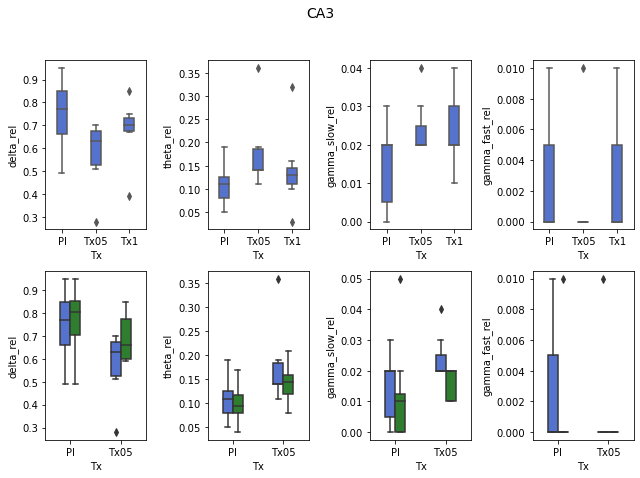

In [76]:
plt.figure(figsize=(9, 6))
ax1 = plt.subplot(241)
sns.boxplot(data =spec_data[(spec_data['Site']== 'CA3') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax1)
ax1.get_legend().remove()
ax2 = plt.subplot(242)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA3') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax2)
ax2.get_legend().remove()
ax3 = plt.subplot(243)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA3') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax3)
ax3.get_legend().remove()
ax4 = plt.subplot(244)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA3') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_fast_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax4)
ax4.get_legend().remove()

ax5 = plt.subplot(245)
sns.boxplot(data =spec_data[(spec_data['Site']== 'CA3') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax5)
ax5.get_legend().remove()
ax6 = plt.subplot(246)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA3') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax6)
ax6.get_legend().remove()
ax7 = plt.subplot(247)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA3') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax7)
ax7.get_legend().remove()
ax8 = plt.subplot(248)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA3') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_fast_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax8)
ax8.get_legend().remove()

plt.tight_layout()
plt.suptitle('CA3', y = 1.1, size = 14)

In [82]:
print('Outlier Detection for CA3 \n')
for band in ['delta_rel', 'theta_rel', 'gamma_slow_rel', 'gamma_fast_rel']:
    for tx in ['Pl', 'Tx05', 'Tx1']:
        for gen in ['WT', 'KO']:
            print(f'{gen} {tx} {band}:')
            outs = pg.madmedianrule(spec_data[band][(spec_data['Site'] == 'CA3') & (spec_data['Genotype'] == gen) & (spec_data['Tx'] == tx)])
            print(spec_data[band][(spec_data['Site'] == 'CA3') & (spec_data['Genotype'] == gen) & (spec_data['Tx'] == tx)][outs])
            print('\n')

Outlier Detection for CA3 

WT Pl delta_rel:
Series([], Name: delta_rel, dtype: float64)


KO Pl delta_rel:
52    0.49
Name: delta_rel, dtype: float64


WT Tx05 delta_rel:
10    0.28
Name: delta_rel, dtype: float64


KO Tx05 delta_rel:
Series([], Name: delta_rel, dtype: float64)


WT Tx1 delta_rel:
4     0.39
70    0.85
Name: delta_rel, dtype: float64


KO Tx1 delta_rel:
Series([], Name: delta_rel, dtype: float64)


WT Pl theta_rel:
1    0.19
Name: theta_rel, dtype: float64


KO Pl theta_rel:
Series([], Name: theta_rel, dtype: float64)


WT Tx05 theta_rel:
10    0.36
Name: theta_rel, dtype: float64


KO Tx05 theta_rel:
76     0.08
100    0.21
103    0.09
Name: theta_rel, dtype: float64


WT Tx1 theta_rel:
4     0.32
70    0.03
Name: theta_rel, dtype: float64


KO Tx1 theta_rel:
Series([], Name: theta_rel, dtype: float64)


WT Pl gamma_slow_rel:
Series([], Name: gamma_slow_rel, dtype: float64)


KO Pl gamma_slow_rel:
52    0.05
Name: gamma_slow_rel, dtype: float64


WT Tx05 gamma_slow_r

Text(0.5, 1.1, 'CA1')

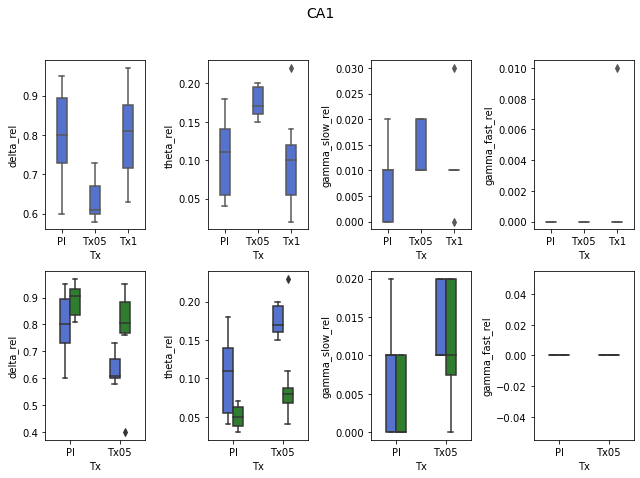

In [77]:
plt.figure(figsize=(9, 6))
ax1 = plt.subplot(241)
sns.boxplot(data =spec_data[(spec_data['Site']== 'CA1') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax1)
ax1.get_legend().remove()
ax2 = plt.subplot(242)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA1') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax2)
ax2.get_legend().remove()
ax3 = plt.subplot(243)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA1') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax3)
ax3.get_legend().remove()
ax4 = plt.subplot(244)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA1') & (spec_data['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_fast_rel', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax4)
ax4.get_legend().remove()

ax5 = plt.subplot(245)
sns.boxplot(data =spec_data[(spec_data['Site']== 'CA1') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax5)
ax5.get_legend().remove()
ax6 = plt.subplot(246)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA1') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax6)
ax6.get_legend().remove()
ax7 = plt.subplot(247)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA1') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax7)
ax7.get_legend().remove()
ax8 = plt.subplot(248)
sns.boxplot(data = spec_data[(spec_data['Site']== 'CA1') & (spec_data['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_fast_rel', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = True, ax =ax8)
ax8.get_legend().remove()

plt.tight_layout()
plt.suptitle('CA1', y = 1.1, size = 14)

In [4]:
print('Outlier Detection for CA1 \n')
for band in ['delta_rel', 'theta_rel', 'gamma_slow_rel', 'gamma_fast_rel']:
    for tx in ['Pl', 'Tx05', 'Tx1']:
        for gen in ['WT', 'KO']:
            print(f'{gen} {tx} {band}:')
            outs = pg.madmedianrule(spec_data[band][(spec_data['Site'] == 'CA1') & (spec_data['Genotype'] == gen) & (spec_data['Tx'] == tx)])
            print(spec_data[band][(spec_data['Site'] == 'CA1') & (spec_data['Genotype'] == gen) & (spec_data['Tx'] == tx)][outs])
            print('\n')

Outlier Detection for CA1 

WT Pl delta_rel:
Series([], Name: delta_rel, dtype: float64)


KO Pl delta_rel:
Series([], Name: delta_rel, dtype: float64)


WT Tx05 delta_rel:
14    0.71
23    0.73
Name: delta_rel, dtype: float64


KO Tx05 delta_rel:
8    0.4
Name: delta_rel, dtype: float64


WT Tx1 delta_rel:
Series([], Name: delta_rel, dtype: float64)


KO Tx1 delta_rel:
Series([], Name: delta_rel, dtype: float64)


WT Pl theta_rel:
Series([], Name: theta_rel, dtype: float64)


KO Pl theta_rel:
Series([], Name: theta_rel, dtype: float64)


WT Tx05 theta_rel:
Series([], Name: theta_rel, dtype: float64)


KO Tx05 theta_rel:
8    0.23
Name: theta_rel, dtype: float64


WT Tx1 theta_rel:
Series([], Name: theta_rel, dtype: float64)


KO Tx1 theta_rel:
Series([], Name: theta_rel, dtype: float64)


WT Pl gamma_slow_rel:
Series([], Name: gamma_slow_rel, dtype: float64)


KO Pl gamma_slow_rel:
53    0.01
83    0.01
89    0.01
Name: gamma_slow_rel, dtype: float64


WT Tx05 gamma_slow_rel:
26    0.

In [5]:
spec_data.iloc[[51, 52, 10, 4]]

,Date,Genotype,Sex,Tx,Site,total_pw,delta_abs,theta_abs,gamma_slow_abs,gamma_fast_abs,delta_rel,theta_rel,gamma_slow_rel,gamma_fast_rel
51,90921,KO,Fem,Pl,DG,14805.17,6948.23,2890.08,797.84,110.41,0.47,0.20,0.05,0.01
52,90921,KO,Fem,Pl,CA3,12438.47,6103.17,2086.36,646.99,131.63,0.49,0.17,0.05,0.01
10,131021,WT,Male,Tx05,CA3,29568.33,8370.13,10601.69,1224.10,121.57,0.28,0.36,0.04,0.00
4,271021,WT,Fem,Tx1,CA3,26440.23,10275.11,8384.49,987.61,87.29,0.39,0.32,0.04,0.00


### Droping 090921 file

In [6]:
tidy_spec = spec_data.drop(index = spec_data[spec_data['Date']== 90921].index)

In [7]:
tidy_spec[tidy_spec['Date']==90921]

,Date,Genotype,Sex,Tx,Site,total_pw,delta_abs,theta_abs,gamma_slow_abs,gamma_fast_abs,delta_rel,theta_rel,gamma_slow_rel,gamma_fast_rel


In [14]:
tidy_spec['Group'] = tidy_spec['Genotype'] +'_'+tidy_spec['Tx']

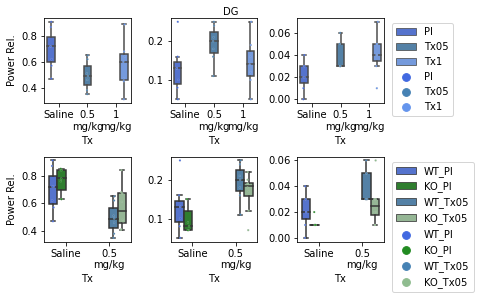

In [37]:
dg_fig = plt.figure(figsize=(6.5, 4))
ax1 = plt.subplot(231)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, ax =ax1)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Power Rel.')
labels = ['Saline', '0.5\nmg/kg', '1\nmg/kg']
ax1.set_xticklabels(labels)
ax2 = plt.subplot(232)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, ax =ax2)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax2)
ax2.get_legend().remove()
ax2.set_ylabel('')
ax2.set_xticklabels(labels)
ax3 = plt.subplot(233)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, ax =ax3)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax3)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax3.set_ylabel('')
ax3.set_xticklabels(labels)

ax4 = plt.subplot(234)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, showfliers = False, ax =ax4)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax4)
ax4.get_legend().remove()
ax4.set_ylabel('Power Rel.')
labels = ['Saline', '0.5\nmg/kg']
ax4.set_xticklabels(labels)
ax5 = plt.subplot(235)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, showfliers = False, ax =ax5)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax5)
ax5.get_legend().remove()
ax5.set_ylabel('')
ax5.set_xticklabels(labels)
ax6 = plt.subplot(236)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, showfliers = False, ax =ax6)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax6)
ax6.set_ylabel('')
ax6.set_xticklabels(labels)
ax6.legend(loc = 2, frameon=False)

plt.tight_layout()
plt.suptitle('DG', y = 1, size = 10)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [38]:
dg_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/dg_fig.svg')

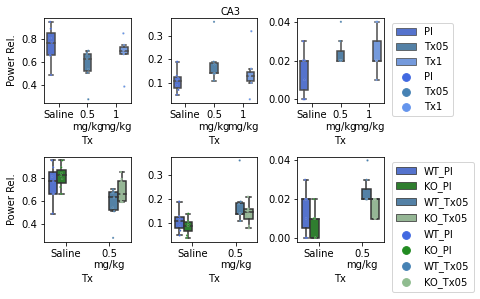

In [58]:
ca3_fig = plt.figure(figsize=(6.5, 4))
ax1 = plt.subplot(231)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, dodge=True, ax =ax1)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Power Rel.')
labels = ['Saline', '0.5\nmg/kg', '1\nmg/kg']
ax1.set_xticklabels(labels)
ax2 = plt.subplot(232)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, dodge=True, ax =ax2)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax2)
ax2.get_legend().remove()
ax2.set_ylabel('')
ax2.set_xticklabels(labels)
ax3 = plt.subplot(233)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, dodge=True, ax =ax3)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax3)
ax3.get_legend().remove()
ax3.set_ylabel('')
ax3.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax4 = plt.subplot(234)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], showfliers = False, dodge=True, ax =ax4)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax4)
ax4.get_legend().remove()
ax4.set_ylabel('Power Rel.')
labels = ['Saline', '0.5\nmg/kg']
ax4.set_xticklabels(labels)
ax5 = plt.subplot(235)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], showfliers = False, dodge=True, ax =ax5)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax5)
ax5.get_legend().remove()
ax5.set_ylabel('')
ax5.set_xticklabels(labels)
ax6 = plt.subplot(236)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], showfliers = False,dodge=True, ax =ax6)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax6)
ax6.legend(loc = 4, frameon=False)
ax6.set_xticklabels(labels)
ax6.set_ylabel('')
ax6.get_legend().remove()

plt.tight_layout()
plt.suptitle('CA3', y = 1, size = 10)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [59]:
ca3_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/ca3_fig.svg')

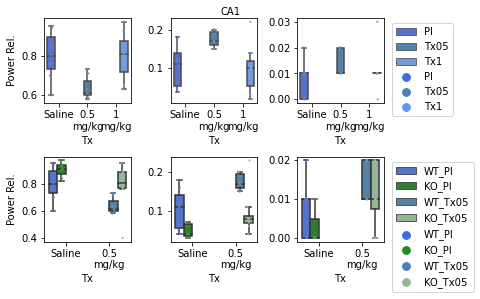

In [60]:
ca1_fig = plt.figure(figsize=(6.5, 4))
ax1 = plt.subplot(231)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, dodge=True, ax =ax1)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'delta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax1)
ax1.get_legend().remove()
ax1.set_ylabel('Power Rel.')
labels = ['Saline', '0.5\nmg/kg', '1\nmg/kg']
ax1.set_xticklabels(labels)
ax2 = plt.subplot(232)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, dodge=True, ax =ax2)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'theta_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax2)
ax2.get_legend().remove()
ax2.set_ylabel('')
ax2.set_xticklabels(labels)
ax3 = plt.subplot(233)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], showfliers = False, dodge=True, ax =ax3)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Tx', order = ['Pl', 'Tx05', 'Tx1'], hue_order = ['Pl', 'Tx05', 'Tx1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth=0.2, dodge=True, ax =ax3)
ax3.get_legend().remove()
ax3.set_ylabel('')
ax3.set_xticklabels(labels)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

ax4 = plt.subplot(234)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], showfliers = False, dodge=True, ax =ax4)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'delta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax4)
ax4.get_legend().remove()
ax4.set_ylabel('Power Rel.')
labels = ['Saline', '0.5\nmg/kg']
ax4.set_xticklabels(labels)
ax5 = plt.subplot(235)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], showfliers = False, dodge=True, ax =ax5)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'theta_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax5)
ax5.get_legend().remove()
ax5.set_ylabel('')
ax5.set_xticklabels(labels)
ax6 = plt.subplot(236)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], showfliers = False,dodge=True, ax =ax6)
sns.stripplot(data =tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'gamma_slow_rel', hue = 'Group', order = ['Pl', 'Tx05'], hue_order=['WT_Pl', 'KO_Pl', 'WT_Tx05', 'KO_Tx05'], palette=['royalblue', 'forestgreen', 'steelblue', 'darkseagreen'], dodge=True, edgecolor='silver', size=2, linewidth=0.2, ax =ax6)
ax6.legend(loc = 4, frameon=False)
ax6.set_xticklabels(labels)
ax6.set_ylabel('')
ax6.get_legend().remove()

plt.tight_layout()
plt.suptitle('CA1', y = 1, size = 10)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [61]:
ca1_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/ca1_fig.svg')

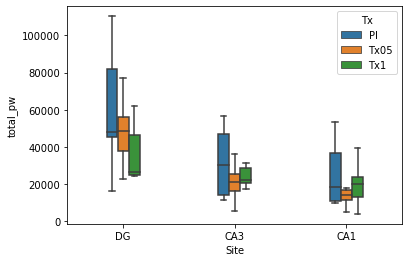

In [62]:
sns.boxplot(data =tidy_spec[tidy_spec['Genotype'] == 'WT'], x = 'Site', y = 'total_pw', hue = 'Tx', width=0.3, hue_order = ['Pl', 'Tx05', 'Tx1'], showfliers = False)


Text(0.5, 1.1, 'Total Power')

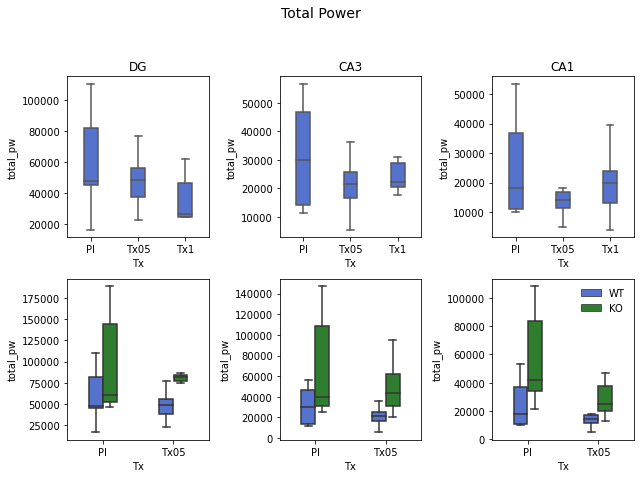

In [63]:
plt.figure(figsize=(9, 6))
ax1 = plt.subplot(231)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'total_pw', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax1)
ax1.get_legend().remove()
ax1.set_title('DG')
ax2 = plt.subplot(232)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'total_pw', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax2)
ax2.get_legend().remove()
ax2.set_title('CA3')
ax3 = plt.subplot(233)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Genotype'] == 'WT')], x = 'Tx', y = 'total_pw', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax3)
ax3.get_legend().remove()
ax3.set_title('CA1')

ax4 = plt.subplot(234)
sns.boxplot(data =tidy_spec[(tidy_spec['Site']== 'DG') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'total_pw', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax4)
ax4.get_legend().remove()
ax5 = plt.subplot(235)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA3') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'total_pw', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax5)
ax5.get_legend().remove()
ax6 = plt.subplot(236)
sns.boxplot(data = tidy_spec[(tidy_spec['Site']== 'CA1') & (tidy_spec['Tx'] != 'Tx1')], x = 'Tx', y = 'total_pw', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax6)
ax6.legend(loc = 1, frameon=False)

plt.tight_layout()
plt.suptitle('Total Power', y = 1.1, size = 14)

### Statistics
### Conservative Approach

#### Effect of Tx on WT

In [64]:
wt_df = tidy_spec[tidy_spec['Genotype'] == 'WT']

In [65]:
wt_df.columns

Index(['Date', 'Genotype', 'Sex', 'Tx', 'Site', 'total_pw', 'delta_abs',
       'theta_abs', 'gamma_slow_abs', 'gamma_fast_abs', 'delta_rel',
       'theta_rel', 'gamma_slow_rel', 'gamma_fast_rel', 'Group'],
      dtype='object')

In [66]:
wt_rel = wt_df[['Date', 'Genotype', 'Sex', 'Tx', 'Site', 'delta_rel', 'theta_rel', 'gamma_slow_rel']]

In [67]:
melt_wt = wt_rel.melt(id_vars = ['Date', 'Genotype', 'Sex', 'Tx', 'Site'], value_vars = ['delta_rel', 'theta_rel', 'gamma_slow_rel'], var_name = 'band', value_name = 'rel_power')


In [68]:
melt_wt

,Date,Genotype,Sex,Tx,Site,band,rel_power
0,41021,WT,Male,Pl,DG,delta_rel,0.47
1,41021,WT,Male,Pl,CA3,delta_rel,0.49
2,41021,WT,Male,Pl,CA1,delta_rel,0.60
3,271021,WT,Fem,Tx1,DG,delta_rel,0.31
4,271021,WT,Fem,Tx1,CA3,delta_rel,0.39
...,...,...,...,...,...,...,...
184,10921,WT,Fem,Tx1,CA3,gamma_slow_rel,0.02
185,10921,WT,Fem,Tx1,CA1,gamma_slow_rel,0.00
186,310821,WT,Fem,Pl,DG,gamma_slow_rel,0.02
187,310821,WT,Fem,Pl,CA3,gamma_slow_rel,0.02


In [69]:
pg.anova(data = melt_wt, dv = 'rel_power', between = ['Site', 'Tx', 'band'])

,Source,SS,DF,MS,F,p-unc,np2
0,Site,0.037029,2.0,0.018514,2.362196,9.745083e-02,0.028337
1,Tx,0.034695,2.0,0.017348,2.213344,1.126304e-01,0.026598
2,band,14.833965,2.0,7.416983,946.316179,4.357648e-90,0.921154
3,Site * Tx,0.004248,4.0,0.001062,0.135486,9.690405e-01,0.003334
4,Site * band,0.232606,4.0,0.058152,7.419431,1.637099e-05,0.154831
5,Tx * band,0.373721,4.0,0.093430,11.920545,1.631071e-08,0.227402
6,Site * Tx * band,0.025917,8.0,0.003240,0.413344,9.117086e-01,0.020004
7,Residual,1.269714,162.0,0.007838,NaN,NaN,NaN


In [70]:
pg.anova(data = melt_wt, dv = 'rel_power', between = ['Tx','band'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.034695,2,0.017348,1.989514,1.397579e-01,0.021628
1,band,14.833965,2,7.416983,850.617844,1.882074e-92,0.904318
2,Tx * band,0.373721,4,0.093430,10.715053,8.208321e-08,0.192319
3,Residual,1.569514,180,0.008720,NaN,NaN,NaN


In [71]:
pg.pairwise_ttests(data = melt_wt, dv = 'rel_power', between = ['band', 'Tx'], subject = 'Date', tail = 'greater', padjust = 'holm')

,Contrast,band,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,band,-,delta_rel,theta_rel,False,True,23.445417,124.0,greater,1.057878e-47,2.115755e-47,holm,9.873e+43,4.152050
1,band,-,delta_rel,gamma_slow_rel,False,True,30.964902,124.0,greater,1.693620e-60,5.080861e-60,holm,4.35e+56,5.483708
2,band,-,theta_rel,gamma_slow_rel,False,True,13.647428,124.0,greater,9.282813e-27,9.282813e-27,holm,2.502e+23,2.416882
3,Tx,-,Pl,Tx1,False,True,0.213399,124.0,greater,4.156831e-01,7.992325e-01,holm,0.388,0.037792
4,Tx,-,Pl,Tx05,False,True,0.625455,124.0,greater,2.664108e-01,7.992325e-01,holm,0.454,0.110765
5,Tx,-,Tx1,Tx05,False,True,0.412448,124.0,greater,3.403617e-01,7.992325e-01,holm,0.411,0.073042
6,band * Tx,delta_rel,Pl,Tx1,False,True,1.279000,40.0,greater,1.041338e-01,7.289363e-01,holm,1.161,0.387261
7,band * Tx,delta_rel,Pl,Tx05,False,True,4.318576,40.0,greater,5.032860e-05,4.529574e-04,holm,432.121,1.307595
8,band * Tx,delta_rel,Tx1,Tx05,False,True,2.522464,40.0,greater,7.867240e-03,6.293792e-02,holm,6.985,0.763762
9,band * Tx,theta_rel,Pl,Tx1,False,True,-0.739880,40.0,greater,7.681533e-01,1.000000e+00,holm,0.755,-0.224024


In [72]:
pg.anova(data = melt_wt, dv = 'rel_power', between = ['Site','band'])

,Source,SS,DF,MS,F,p-unc,np2
0,Site,0.037029,2,0.018514,1.950817,1.451518e-01,0.021216
1,band,14.833965,2,7.416983,781.514124,1.807703e-89,0.896731
2,Site * band,0.232606,4,0.058152,6.127328,1.207018e-04,0.119844
3,Residual,1.708295,180,0.009491,NaN,NaN,NaN


In [73]:
pg.pairwise_ttests(data = melt_wt, dv = 'rel_power', between = ['band', 'Site'], subject = 'Date', tail = 'greater', padjust = 'holm')

,Contrast,band,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,band,-,delta_rel,theta_rel,False,True,23.445417,124.0,greater,1.057878e-47,2.115755e-47,holm,9.873e+43,4.152050
1,band,-,delta_rel,gamma_slow_rel,False,True,30.964902,124.0,greater,1.693620e-60,5.080861e-60,holm,4.35e+56,5.483708
2,band,-,theta_rel,gamma_slow_rel,False,True,13.647428,124.0,greater,9.282813e-27,9.282813e-27,holm,2.502e+23,2.416882
3,Site,-,DG,CA3,False,True,-0.342074,124.0,greater,6.335629e-01,1.000000e+00,holm,0.401,-0.060579
4,Site,-,DG,CA1,False,True,-0.639872,124.0,greater,7.382819e-01,1.000000e+00,holm,0.458,-0.113318
5,Site,-,CA3,CA1,False,True,-0.302725,124.0,greater,6.186968e-01,1.000000e+00,holm,0.397,-0.053611
6,band * Site,delta_rel,DG,CA3,False,True,-1.505910,40.0,greater,9.300264e-01,1.000000e+00,holm,0.673,-0.455965
7,band * Site,delta_rel,DG,CA1,False,True,-3.329186,40.0,greater,9.990606e-01,1.000000e+00,holm,0.027,-1.008024
8,band * Site,delta_rel,CA3,CA1,False,True,-1.765858,40.0,greater,9.574740e-01,1.000000e+00,holm,0.484,-0.534673
9,band * Site,theta_rel,DG,CA3,False,True,0.546378,40.0,greater,2.939206e-01,1.000000e+00,holm,0.683,0.165434


### Now for the KO vs WT groups (Pl and Tx05)

In [74]:
Tx_data = tidy_spec[tidy_spec['Tx'] != 'Tx1']

In [75]:
Tx_tidy = Tx_data[['Date', 'Genotype', 'Sex', 'Tx', 'Site', 'delta_rel', 'theta_rel', 'gamma_slow_rel']]

In [76]:
Tx_melt = Tx_tidy.melt(id_vars = ['Date', 'Genotype', 'Sex', 'Tx', 'Site'], value_vars = ['delta_rel', 'theta_rel', 'gamma_slow_rel'], var_name = 'band', value_name = 'rel_power')


In [77]:
pg.anova(data = Tx_melt, dv = 'rel_power', between = ['Genotype','Tx', 'band', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,0.014603,1.0,0.014603,2.384137,1.239779e-01,0.010485
1,Tx,0.055317,1.0,0.055317,9.031539,2.954439e-03,0.038591
2,band,23.747884,2.0,11.873942,1938.642929,1.429280e-142,0.945153
3,Site,0.041916,2.0,0.020958,3.421761,3.436366e-02,0.029518
4,Genotype * Tx,0.000839,1.0,0.000839,0.136939,7.116911e-01,0.000608
5,Genotype * band,0.221762,2.0,0.110881,18.103379,5.126104e-08,0.138613
6,Tx * band,0.595307,2.0,0.297653,48.597495,2.865300e-18,0.301665
7,Genotype * Site,0.000743,2.0,0.000372,0.060660,9.411584e-01,0.000539
8,Tx * Site,0.002233,2.0,0.001117,0.182291,8.334817e-01,0.001618
9,band * Site,0.320390,4.0,0.080098,13.077416,1.360622e-09,0.188633


In [78]:
pg.anova(data = Tx_melt, dv = 'rel_power', between = ['Genotype','band'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,0.012783,1.0,0.012783,1.338569,2.483692e-01,0.005222
1,band,23.747884,2.0,11.873942,1243.333017,3.069147e-132,0.906991
2,Genotype * band,0.198429,2.0,0.099214,10.388842,4.598171e-05,0.075342
3,Residual,2.435273,255.0,0.009550,NaN,NaN,NaN


In [79]:
pg.pairwise_ttests(data = Tx_melt, dv = 'rel_power', between = ['band', 'Genotype'], subject = 'Date', tail = 'greater', padjust = 'holm')


,Contrast,band,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,band,-,delta_rel,theta_rel,False,True,30.779777,172.000000,greater,3.640627e-72,7.281254e-72,holm,1.79e+68,4.646439
1,band,-,delta_rel,gamma_slow_rel,False,True,39.192380,172.000000,greater,5.832306e-88,1.749692e-87,holm,8.324e+83,5.916384
2,band,-,theta_rel,gamma_slow_rel,False,True,16.074093,172.000000,greater,2.168408e-36,2.168408e-36,holm,7.677e+32,2.426505
3,Genotype,-,WT,KO,False,True,-0.356061,257.442834,greater,6.389567e-01,NaN,NaN,0.289,-0.043755
4,band * Genotype,delta_rel,WT,KO,False,True,-2.644875,83.869764,greater,9.951229e-01,9.951229e-01,holm,0.111,-0.563347
5,band * Genotype,theta_rel,WT,KO,False,True,3.120363,81.360989,greater,1.249775e-03,3.749325e-03,holm,27.974,0.666856
6,band * Genotype,gamma_slow_rel,WT,KO,False,True,2.664310,77.892135,greater,4.686493e-03,9.372986e-03,holm,9.398,0.571220


In [80]:
pg.anova(data = Tx_melt, dv = 'rel_power', between = ['Tx','band'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.053498,1.0,0.053498,6.750068,9.919746e-03,0.025788
1,band,23.747884,2.0,11.873942,1498.186745,1.110065e-141,0.921572
2,Tx * band,0.571974,2.0,0.285987,36.084216,1.586793e-14,0.220585
3,Residual,2.021013,255.0,0.007926,NaN,NaN,NaN


In [81]:
pg.pairwise_ttests(data = Tx_melt, dv = 'rel_power', between = ['band', 'Tx'], subject = 'Date', tail = 'greater', padjust = 'holm')


,Contrast,band,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,band,-,delta_rel,theta_rel,False,True,30.779777,172.000000,greater,3.640627e-72,7.281254e-72,holm,1.79e+68,4.646439
1,band,-,delta_rel,gamma_slow_rel,False,True,39.192380,172.000000,greater,5.832306e-88,1.749692e-87,holm,8.324e+83,5.916384
2,band,-,theta_rel,gamma_slow_rel,False,True,16.074093,172.000000,greater,2.168408e-36,2.168408e-36,holm,7.677e+32,2.426505
3,Tx,-,Pl,Tx05,False,True,0.719102,235.752823,greater,2.363952e-01,NaN,NaN,0.347,0.089580
4,band * Tx,delta_rel,Pl,Tx05,False,True,5.164237,84.076154,greater,7.975535e-07,2.392660e-06,holm,1.841e+04,1.091548
5,band * Tx,theta_rel,Pl,Tx05,False,True,-5.176823,83.245294,greater,9.999992e-01,1.000000e+00,holm,5.184e-05,-1.092688
6,band * Tx,gamma_slow_rel,Pl,Tx05,False,True,-4.321467,81.518719,greater,9.999783e-01,1.000000e+00,holm,0.001,-0.910223


### Exploring a MANOVA approach

#### First on the WT data set

Prediction varialbes: Tx and Site
Outcome variables: Delta, Theta, Gamma bands relative power

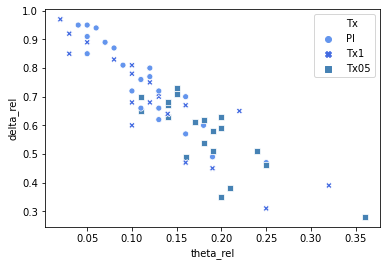

In [82]:
sns.scatterplot(data = wt_df, x = 'theta_rel', y = 'delta_rel', hue = 'Tx', style = 'Tx', palette = ['cornflowerblue', 'royalblue', 'steelblue'])

In [83]:
pg.multivariate_normality(wt_df[['delta_rel', 'theta_rel']])

(True, 0.06441584135360079)

In [84]:
np.corrcoef(wt_df[['delta_rel', 'theta_rel', 'gamma_slow_rel']], rowvar = False)

array([[ 1.        , -0.89564426, -0.74852503],
       [-0.89564426,  1.        ,  0.46886307],
       [-0.74852503,  0.46886307,  1.        ]])

In [85]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats import multicomp

In [88]:
mano = MANOVA.from_formula('delta_rel + theta_rel + gamma_slow_rel ~ Tx + Site', data = wt_df)

In [89]:
print(mano.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0074 3.0000 56.0000 2517.8259 0.0000
         Pillai's trace   0.9926 3.0000 56.0000 2517.8259 0.0000
 Hotelling-Lawley trace 134.8835 3.0000 56.0000 2517.8259 0.0000
    Roy's greatest root 134.8835 3.0000 56.0000 2517.8259 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
              Tx           Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.6371 6.0000 112.0000  4.7205 0.0003
            Pillai's trace 0.4011 6.0000 114.

#### Site and Tx are both significant and contribute almost equally to the model.

In [90]:
delta_reg = ols('delta_rel ~ Tx + Site+ Tx:Site', data = wt_df).fit()
aov = sm.stats.anova_lm(delta_reg, type = 2)
print('ANOVA for Tx * Site on Delta band \n')
print(aov)
# Test for Tx
mc = multicomp.pairwise_tukeyhsd(wt_df['delta_rel'], wt_df['Tx'], alpha = 0.0166)
print('\nTuckey HSD for Tx \n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(wt_df['delta_rel'], wt_df['Site'], alpha = 0.0166)
print('\nTuckey HSD for Site\n')
print(mc)

ANOVA for Tx * Site on Delta band 

            df    sum_sq   mean_sq         F    PR(>F)
Tx         2.0  0.350156  0.175078  9.018970  0.000417
Site       2.0  0.254613  0.127306  6.558069  0.002820
Tx:Site    4.0  0.026102  0.006525  0.336150  0.852415
Residual  54.0  1.048257  0.019412       NaN       NaN

Tuckey HSD for Tx 

Multiple Comparison of Means - Tukey HSD, FWER=0.02 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    Pl   Tx05    -0.18  0.001 -0.3105 -0.0495   True
    Pl    Tx1  -0.0633 0.3592 -0.1939  0.0672  False
  Tx05    Tx1   0.1167  0.036 -0.0139  0.2472  False
----------------------------------------------------

Tuckey HSD for Site

Multiple Comparison of Means - Tukey HSD, FWER=0.02 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   CA1    CA3   -0.079 0.2283 -0.2142  0.0561  False
   CA1     DG  -0.1557 0.0049 -0.2909 -0.0206   True
   CA3    

In [92]:
theta_reg = ols('theta_rel ~ Tx + Site+ Tx:Site', data = wt_df).fit()
aov = sm.stats.anova_lm(theta_reg, type = 2)
print('ANOVA for Tx * Site on Theta band \n')
print(aov)
# Test for Tx
mc = multicomp.pairwise_tukeyhsd(wt_df['theta_rel'], wt_df['Tx'], alpha = 0.0166)
print('\nTuckey HSD for Tx \n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(wt_df['theta_rel'], wt_df['Site'], alpha = 0.0166)
print('\nTuckey HSD for Site\n')
print(mc)

ANOVA for Tx * Site on Theta band 

            df    sum_sq   mean_sq         F    PR(>F)
Tx         2.0  0.056352  0.028176  7.097561  0.001834
Site       2.0  0.009267  0.004633  1.167133  0.318985
Tx:Site    4.0  0.003581  0.000895  0.225510  0.922980
Residual  54.0  0.214371  0.003970       NaN       NaN

Tuckey HSD for Tx 

Multiple Comparison of Means - Tukey HSD, FWER=0.02 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    Pl   Tx05   0.0695 0.0015  0.0156  0.1235   True
    Pl    Tx1   0.0148 0.7009 -0.0392  0.0687  False
  Tx05    Tx1  -0.0548 0.0148 -0.1087 -0.0008   True
----------------------------------------------------

Tuckey HSD for Site

Multiple Comparison of Means - Tukey HSD, FWER=0.02
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   CA1    CA3   0.0176 0.6629 -0.0417 0.0769  False
   CA1     DG   0.0295 0.3404 -0.0298 0.0888  False
   CA3     DG  

In [103]:
gamma_reg = ols('gamma_slow_rel ~ Tx + Site + Tx:Site', data = wt_df).fit()
aov = sm.stats.anova_lm(gamma_reg, type = 2)
print('ANOVA for Tx * Site on Gamma Slow band \n')
print(aov)
# Test for Tx
mc = multicomp.pairwise_tukeyhsd(wt_df['gamma_slow_rel'], wt_df['Tx'], alpha = 0.025)
print('\nTuckey HSD for Tx \n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(wt_df['gamma_slow_rel'], wt_df['Site'], alpha = 0.025)
print('\nTuckey HSD for Site\n')
print(mc)

ANOVA for Tx * Site on Gamma Slow band 

            df    sum_sq   mean_sq          F        PR(>F)
Tx         2.0  0.001908  0.000954   7.270161  1.599873e-03
Site       2.0  0.005756  0.002878  21.931452  1.066456e-07
Tx:Site    4.0  0.000483  0.000121   0.919355  4.594931e-01
Residual  54.0  0.007086  0.000131        NaN           NaN

Tuckey HSD for Tx 

Multiple Comparison of Means - Tukey HSD, FWER=0.03
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    Pl   Tx05   0.0119 0.0319 -0.0004 0.0243  False
    Pl    Tx1   0.0114 0.0411 -0.0009 0.0238  False
  Tx05    Tx1  -0.0005    0.9 -0.0128 0.0119  False
---------------------------------------------------

Tuckey HSD for Site

Multiple Comparison of Means - Tukey HSD, FWER=0.03
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   CA1    CA3     0.01 0.0327 -0.0004 0.0204  False
   CA1     DG   0.0233  0.001  0.0129 0.0337

### Now KO vs WT

In [96]:
mano = MANOVA.from_formula('delta_rel + theta_rel + gamma_slow_rel ~ Tx + Genotype + Site', data = Tx_tidy)

In [97]:
print(mano.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda   0.0071 3.0000 80.0000 3704.9017 0.0000
         Pillai's trace   0.9929 3.0000 80.0000 3704.9017 0.0000
 Hotelling-Lawley trace 138.9338 3.0000 80.0000 3704.9017 0.0000
    Roy's greatest root 138.9338 3.0000 80.0000 3704.9017 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
               Tx           Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.6257 3.0000 80.0000 15.9505 0.0000
             Pillai's trace 0.3743 3.0000 80.

In [99]:
delta_reg = ols('delta_rel ~ Tx + Genotype + Site+ Tx:Site + Tx:Genotype + Genotype:Site + Tx:Genotype:Site', data = Tx_tidy).fit()
aov = sm.stats.anova_lm(delta_reg, type = 2)
print('ANOVA for Tx * Site on Delta band \n')
print(aov)
# Test for Tx
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['delta_rel'], Tx_tidy['Tx'], alpha = 0.0166)
print('\nTuckey HSD for Tx \n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['delta_rel'], Tx_tidy['Site'], alpha = 0.0166)
print('\nTuckey HSD for Site\n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['delta_rel'], Tx_tidy['Genotype'], alpha = 0.0166)
print('\nTuckey HSD for Genotype\n')
print(mc)

ANOVA for Tx * Site on Delta band 

                    df    sum_sq   mean_sq          F        PR(>F)
Tx                 1.0  0.542103  0.542103  34.257174  1.191632e-07
Genotype           1.0  0.196064  0.196064  12.389898  7.377488e-04
Site               2.0  0.332283  0.166141  10.498981  9.549305e-05
Tx:Site            2.0  0.014288  0.007144   0.451462  6.384152e-01
Tx:Genotype        1.0  0.007239  0.007239   0.457441  5.009028e-01
Genotype:Site      2.0  0.010516  0.005258   0.332273  7.183416e-01
Tx:Genotype:Site   2.0  0.001619  0.000809   0.051145  9.501737e-01
Residual          75.0  1.186839  0.015825        NaN           NaN

Tuckey HSD for Tx 

Multiple Comparison of Means - Tukey HSD, FWER=0.02
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    Pl   Tx05   -0.158 0.001 -0.2332 -0.0828   True
---------------------------------------------------

Tuckey HSD for Site

Multiple Comparison of Means - Tukey HSD, FWER=0.

In [104]:
theta_reg = ols('theta_rel ~ Tx + Genotype + Site+ Tx:Site + Tx:Genotype + Genotype:Site + Tx:Genotype:Site', data = Tx_tidy).fit()
aov = sm.stats.anova_lm(theta_reg, type = 2)
print('ANOVA for Tx * Site on Theta band \n')
print(aov)
# Test for Tx
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['theta_rel'], Tx_tidy['Tx'], alpha = 0.0166)
print('\nTuckey HSD for Tx \n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['theta_rel'], Tx_tidy['Site'], alpha = 0.0166)
print('\nTuckey HSD for Site\n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['theta_rel'], Tx_tidy['Genotype'], alpha = 0.0166)
print('\nTuckey HSD for Genotype\n')
print(mc)

ANOVA for Tx * Site on Theta band 

                    df    sum_sq   mean_sq          F        PR(>F)
Tx                 1.0  0.080709  0.080709  32.812176  1.990491e-07
Genotype           1.0  0.039005  0.039005  15.857220  1.566086e-04
Site               2.0  0.026338  0.013169   5.353808  6.707633e-03
Tx:Site            2.0  0.000384  0.000192   0.078052  9.249916e-01
Tx:Genotype        1.0  0.001042  0.001042   0.423791  5.170409e-01
Genotype:Site      2.0  0.007449  0.003724   1.514105  2.266527e-01
Tx:Genotype:Site   2.0  0.001131  0.000565   0.229838  7.952198e-01
Residual          75.0  0.184480  0.002460        NaN           NaN

Tuckey HSD for Tx 

Multiple Comparison of Means - Tukey HSD, FWER=0.02
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
    Pl   Tx05    0.061 0.001 0.032 0.0899   True
------------------------------------------------

Tuckey HSD for Site

Multiple Comparison of Means - Tukey HSD, FWER=0.02
group1 gr

In [105]:
gamma_reg = ols('gamma_slow_rel ~ Tx + Genotype + Site+ Tx:Site + Tx:Genotype + Genotype:Site + Tx:Genotype:Site', data = Tx_tidy).fit()
aov = sm.stats.anova_lm(gamma_reg, type = 2)
print('ANOVA for Tx * Site on Gamma-low band \n')
print(aov)
# Test for Tx
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['gamma_slow_rel'], Tx_tidy['Tx'], alpha = 0.0166)
print('\nTuckey HSD for Tx \n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['gamma_slow_rel'], Tx_tidy['Site'], alpha = 0.0166)
print('\nTuckey HSD for Site\n')
print(mc)
mc = multicomp.pairwise_tukeyhsd(Tx_tidy['gamma_slow_rel'], Tx_tidy['Genotype'], alpha = 0.0166)
print('\nTuckey HSD for Genotype\n')
print(mc)

ANOVA for Tx * Site on Gamma-low band 

                    df    sum_sq   mean_sq          F        PR(>F)
Tx                 1.0  0.002659  0.002659  29.428256  6.819329e-07
Genotype           1.0  0.001295  0.001295  14.337428  3.058812e-04
Site               2.0  0.003685  0.001843  20.391622  8.473894e-08
Tx:Site            2.0  0.000300  0.000150   1.661957  1.966790e-01
Tx:Genotype        1.0  0.000007  0.000007   0.076714  7.825631e-01
Genotype:Site      2.0  0.000249  0.000125   1.377931  2.584073e-01
Tx:Genotype:Site   2.0  0.000023  0.000011   0.125802  8.819749e-01
Residual          75.0  0.006777  0.000090        NaN           NaN

Tuckey HSD for Tx 

Multiple Comparison of Means - Tukey HSD, FWER=0.02
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    Pl   Tx05   0.0111 0.001 0.0047 0.0174   True
-------------------------------------------------

Tuckey HSD for Site

Multiple Comparison of Means - Tukey HSD, FWER=0.02
g

In [220]:
pg.anova(data = Tx_tidy, dv = 'delta_rel', between=['Tx', 'Genotype', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.563441,1.0,0.563441,35.605582,7.431409e-08,0.321915
1,Genotype,0.196064,1.0,0.196064,12.389898,7.377488e-04,0.141777
2,Site,0.332283,2.0,0.166141,10.498981,9.549305e-05,0.218733
3,Tx * Genotype,0.007239,1.0,0.007239,0.457441,5.009028e-01,0.006062
4,Tx * Site,0.013589,2.0,0.006795,0.429380,6.525024e-01,0.011321
5,Genotype * Site,0.010516,2.0,0.005258,0.332273,7.183416e-01,0.008783
6,Tx * Genotype * Site,0.001619,2.0,0.000809,0.051145,9.501737e-01,0.001362
7,Residual,1.186839,75.0,0.015825,NaN,NaN,NaN


In [221]:
pg.anova(data = Tx_tidy, dv = 'theta_rel', between=['Tx', 'Genotype', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.084401,1.0,0.084401,34.313179,1.168343e-07,0.313898
1,Genotype,0.039005,1.0,0.039005,15.857220,1.566086e-04,0.174529
2,Site,0.026338,2.0,0.013169,5.353808,6.707633e-03,0.124932
3,Tx * Genotype,0.001042,1.0,0.001042,0.423791,5.170409e-01,0.005619
4,Tx * Site,0.000300,2.0,0.000150,0.061053,9.408202e-01,0.001625
5,Genotype * Site,0.007449,2.0,0.003724,1.514105,2.266527e-01,0.038809
6,Tx * Genotype * Site,0.001131,2.0,0.000565,0.229838,7.952198e-01,0.006092
7,Residual,0.184480,75.0,0.002460,NaN,NaN,NaN


In [222]:
pg.anova(data = Tx_tidy, dv = 'gamma_slow_rel', between=['Tx', 'Genotype', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.002781,1.0,0.002781,30.780115,4.148167e-07,0.290982
1,Genotype,0.001295,1.0,0.001295,14.337428,3.058812e-04,0.160486
2,Site,0.003685,2.0,0.001843,20.391622,8.473894e-08,0.352238
3,Tx * Genotype,0.000007,1.0,0.000007,0.076714,7.825631e-01,0.001022
4,Tx * Site,0.000318,2.0,0.000159,1.757377,1.795248e-01,0.044766
5,Genotype * Site,0.000249,2.0,0.000125,1.377931,2.584073e-01,0.035442
6,Tx * Genotype * Site,0.000023,2.0,0.000011,0.125802,8.819749e-01,0.003344
7,Residual,0.006777,75.0,0.000090,NaN,NaN,NaN


In [227]:
pg.pairwise_tukey(data = Tx_tidy, dv = 'theta_rel', between=['Tx'])


,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,Pl,Tx05,0.095714,0.156667,-0.060952,0.011862,two-sided,-5.138401,0.001,-1.092688


In [228]:
pg.pairwise_tukey(data = Tx_tidy, dv = 'theta_rel', between=['Genotype'])

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO,WT,0.107778,0.148095,-0.040317,0.012857,two-sided,-3.13591,0.001712,-0.666856


In [229]:
pg.pairwise_tukey(data = Tx_tidy, dv = 'theta_rel', between=['Site'])

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,CA1,CA3,0.104828,0.129655,-0.024828,0.016061,two-sided,-1.545806,0.270791,-0.400487
1,CA1,DG,0.104828,0.147241,-0.042414,0.016061,two-sided,-2.640752,0.023197,-0.684166
2,CA3,DG,0.129655,0.147241,-0.017586,0.016061,two-sided,-1.094946,0.516953,-0.283679


In [249]:
pg.anova(data = wt_df, dv = 'total_pw', between = ['Tx', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,9.891374e+09,2,4.945687e+09,3.007572,0.057755,0.100227
1,Site,1.036406e+10,2,5.182028e+09,3.151296,0.050765,0.104516
2,Tx * Site,2.762431e+08,4,6.906078e+07,0.041997,0.996554,0.003101
3,Residual,8.879823e+10,54,1.644412e+09,NaN,NaN,NaN


In [251]:
pg.anova(data = Tx_data, dv = 'total_pw', between = ['Tx', 'Genotype', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,1.138641e+10,1.0,1.138641e+10,6.274138,0.014422,0.077197
1,Genotype,1.352811e+10,1.0,1.352811e+10,7.454254,0.007883,0.090405
2,Site,2.621398e+10,2.0,1.310699e+10,7.222210,0.001354,0.161490
3,Tx * Genotype,6.326864e+08,1.0,6.326864e+08,0.348623,0.556669,0.004627
4,Tx * Site,5.432342e+08,2.0,2.716171e+08,0.149666,0.861252,0.003975
5,Genotype * Site,1.347967e+09,2.0,6.739835e+08,0.371378,0.691044,0.009806
6,Tx * Genotype * Site,1.725038e+08,2.0,8.625192e+07,0.047527,0.953614,0.001266
7,Residual,1.361113e+11,75.0,1.814817e+09,NaN,NaN,NaN


In [252]:
pg.pairwise_tukey(data = Tx_data, dv = 'total_pw', between = 'Site')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,CA1,CA3,37715.815172,47478.200345,-9762.385172,11567.621111,two-sided,-0.843941,0.660466,-0.218648
1,CA1,DG,37715.815172,78435.774828,-40719.959655,11567.621111,two-sided,-3.520167,0.001343,-0.912005
2,CA3,DG,47478.200345,78435.774828,-30957.574483,11567.621111,two-sided,-2.676227,0.020988,-0.693357


In [253]:
pg.pairwise_tukey(data = Tx_data, dv = 'total_pw', between = 'Tx')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,Pl,Tx05,65961.097857,43886.618,22074.479857,9834.910911,two-sided,2.244502,0.0248,0.477297


In [254]:
pg.pairwise_tukey(data = Tx_data, dv = 'total_pw', between = 'Genotype')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO,WT,66228.301556,42023.579762,24204.721794,9775.767926,two-sided,2.475992,0.013288,0.526523


## Coherence

In [230]:
coh_data = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/LFP_data/Spectral_Long/coh_pool.csv')


In [232]:
coh_tidy = coh_data.drop(index = coh_data[coh_data['Date']== 90921].index)

In [234]:
coh_tidy = coh_data.drop(index = coh_data[coh_data['Site']== 'CA3'].index)

In [235]:
coh_tidy

,Date,Genotype,Sex,Tx,Site,Theta_Coh,SG_Coh,HG_Coh
0,41021,WT,Male,Pl,DG,0.204,0.181,0.118
2,41021,WT,Male,Pl,CA1,0.177,0.079,0.054
3,271021,WT,Fem,Tx1,DG,0.097,0.151,0.111
5,271021,WT,Fem,Tx1,CA1,0.213,0.033,0.094
6,261021,KO,Male,Tx05,DG,0.411,0.257,0.436
...,...,...,...,...,...,...,...,...
104,120821,KO,Fem,Tx05,CA1,0.407,0.083,0.052
105,110821,KO,Fem,Tx05,DG,0.728,0.339,0.163
107,110821,KO,Fem,Tx05,CA1,0.225,0.084,0.058
108,90821,KO,Fem,Pl,DG,0.482,0.190,0.312


Text(0.5, 1.1, 'CA3 --> DG')

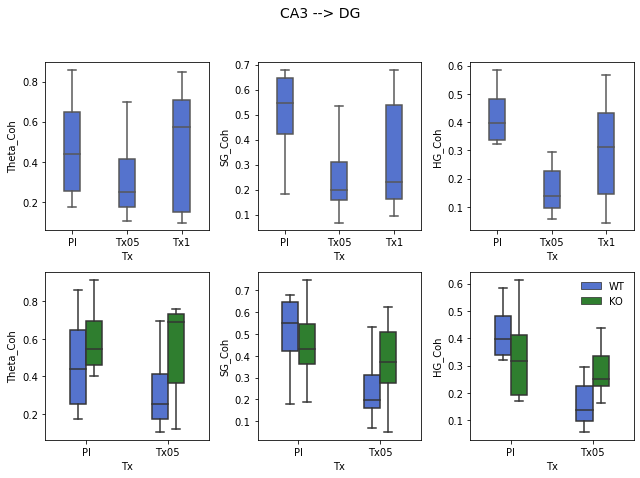

In [240]:
plt.figure(figsize=(9, 6))
ax1 = plt.subplot(231)
sns.boxplot(data =coh_tidy[(coh_tidy['Site']== 'DG') & (coh_tidy['Genotype'] == 'WT')], x = 'Tx', y = 'Theta_Coh', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax1)
ax1.get_legend().remove()
ax2 = plt.subplot(232)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'DG') & (coh_tidy['Genotype'] == 'WT')], x = 'Tx', y = 'SG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax2)
ax2.get_legend().remove()
ax3 = plt.subplot(233)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'DG') & (coh_tidy['Genotype'] == 'WT')], x = 'Tx', y = 'HG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax3)
ax3.get_legend().remove()

ax4 = plt.subplot(234)
sns.boxplot(data =coh_tidy[(coh_tidy['Site']== 'DG') & (coh_tidy['Tx'] != 'Tx1')], x = 'Tx', y = 'Theta_Coh', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax4)
ax4.get_legend().remove()
ax5 = plt.subplot(235)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'DG') & (coh_tidy['Tx'] != 'Tx1')], x = 'Tx', y = 'SG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax5)
ax5.get_legend().remove()
ax6 = plt.subplot(236)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'DG') & (coh_tidy['Tx'] != 'Tx1')], x = 'Tx', y = 'HG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax6)
ax6.legend(loc = 1, frameon=False)

plt.tight_layout()
plt.suptitle('CA3 --> DG', y = 1.1, size = 14)

Text(0.5, 1.1, 'CA3 --> CA1')

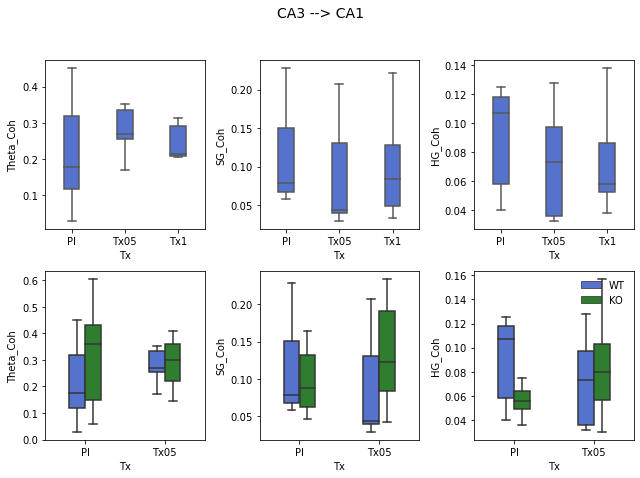

In [241]:
plt.figure(figsize=(9, 6))
ax1 = plt.subplot(231)
sns.boxplot(data =coh_tidy[(coh_tidy['Site']== 'CA1') & (coh_tidy['Genotype'] == 'WT')], x = 'Tx', y = 'Theta_Coh', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax1)
ax1.get_legend().remove()
ax2 = plt.subplot(232)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'CA1') & (coh_tidy['Genotype'] == 'WT')], x = 'Tx', y = 'SG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax2)
ax2.get_legend().remove()
ax3 = plt.subplot(233)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'CA1') & (coh_tidy['Genotype'] == 'WT')], x = 'Tx', y = 'HG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05', 'Tx1'], width=0.3, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax3)
ax3.get_legend().remove()

ax4 = plt.subplot(234)
sns.boxplot(data =coh_tidy[(coh_tidy['Site']== 'CA1') & (coh_tidy['Tx'] != 'Tx1')], x = 'Tx', y = 'Theta_Coh', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax4)
ax4.get_legend().remove()
ax5 = plt.subplot(235)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'CA1') & (coh_tidy['Tx'] != 'Tx1')], x = 'Tx', y = 'SG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax5)
ax5.get_legend().remove()
ax6 = plt.subplot(236)
sns.boxplot(data = coh_tidy[(coh_tidy['Site']== 'CA1') & (coh_tidy['Tx'] != 'Tx1')], x = 'Tx', y = 'HG_Coh', hue = 'Genotype', order = ['Pl', 'Tx05'], width=0.4, palette=['royalblue', 'forestgreen'], showfliers = False, ax =ax6)
ax6.legend(loc = 1, frameon=False)

plt.tight_layout()
plt.suptitle('CA3 --> CA1', y = 1.1, size = 14)

In [242]:
pg.anova(data = coh_tidy[coh_tidy['Genotype'] == 'WT'], dv = 'Theta_Coh', between = ['Tx', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.041989,2,0.020995,0.373915,0.690676,0.020350
1,Site,0.210304,1,0.210304,3.745552,0.060834,0.094238
2,Tx * Site,0.057843,2,0.028922,0.515100,0.601777,0.027821
3,Residual,2.021319,36,0.056148,NaN,NaN,NaN


In [243]:
pg.anova(data = coh_tidy[coh_tidy['Genotype'] == 'WT'], dv = 'SG_Coh', between = ['Tx', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.143581,2,0.071790,3.322258,0.047414,0.155812
1,Site,0.741874,1,0.741874,34.331908,0.000001,0.488141
2,Tx * Site,0.096434,2,0.048217,2.231358,0.122027,0.110292
3,Residual,0.777920,36,0.021609,NaN,NaN,NaN


In [244]:
pg.pairwise_tukey(data = coh_tidy[coh_tidy['Genotype'] == 'WT'], dv = 'SG_Coh', between = 'Tx')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,Pl,Tx05,0.310500,0.168786,0.141714,0.076943,two-sided,1.841805,0.158738,0.675861
1,Pl,Tx1,0.310500,0.221714,0.088786,0.076943,two-sided,1.153913,0.482439,0.423435
2,Tx05,Tx1,0.168786,0.221714,-0.052929,0.076943,two-sided,-0.687892,0.751421,-0.252426


In [245]:
pg.pairwise_tukey(data = coh_tidy[coh_tidy['Genotype'] == 'WT'], dv = 'SG_Coh', between = 'Site')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,CA1,DG,0.100762,0.366571,-0.26581,0.049231,two-sided,-5.399272,0.001,-1.634813


In [246]:
pg.anova(data = coh_tidy[coh_tidy['Tx'] != 'Tx1'], dv = 'Theta_Coh', between = ['Tx', 'Genotype', 'Site'])

,Source,SS,DF,MS,F,p-unc,np2
0,Tx,0.037300,1.0,0.037300,0.885910,0.350940,0.016751
1,Genotype,0.156606,1.0,0.156606,3.719523,0.059247,0.066754
2,Site,0.581347,1.0,0.581347,13.807441,0.000496,0.209816
3,Tx * Genotype,0.003757,1.0,0.003757,0.089234,0.766344,0.001713
4,Tx * Site,0.028427,1.0,0.028427,0.675169,0.415007,0.012818
5,Genotype * Site,0.080018,1.0,0.080018,1.900496,0.173925,0.035259
6,Tx * Genotype * Site,0.019349,1.0,0.019349,0.459549,0.500840,0.008760
7,Residual,2.189403,52.0,0.042104,NaN,NaN,NaN


In [247]:
pg.pairwise_tukey(data = coh_tidy[coh_tidy['Tx'] != 'Tx1'], dv = 'Theta_Coh', between = ['Genotype'])


,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO,WT,0.435656,0.33325,0.102406,0.058258,two-sided,1.757821,0.078779,0.448972


In [248]:
pg.pairwise_tukey(data = coh_tidy[coh_tidy['Tx'] != 'Tx1'], dv = 'SG_Coh', between = ['Genotype'])


,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO,WT,0.266219,0.239643,0.026576,0.052639,two-sided,0.50487,0.623623,0.128951


In [107]:
wt_df.groupby(['Tx', 'Site'])['Date'].count()

Tx    Site
Pl    CA1     7
      CA3     7
      DG      7
Tx05  CA1     7
      CA3     7
      DG      7
Tx1   CA1     7
      CA3     7
      DG      7
Name: Date, dtype: int64

In [108]:
Tx_tidy.groupby(['Genotype', 'Tx', 'Site'])['Date'].count()

Genotype  Tx    Site
KO        Pl    CA1     7
                CA3     7
                DG      7
          Tx05  CA1     8
                CA3     8
                DG      8
WT        Pl    CA1     7
                CA3     7
                DG      7
          Tx05  CA1     7
                CA3     7
                DG      7
Name: Date, dtype: int64